# Linear Regression

[Edward Lu](https://github.com/edwardlu71/notebooks)

#### Mean and Standard Deviation (X)

$$  \begin{align} \mu = \frac{\sum_{i=1}^{N}x_{i}}{N}, \sigma = \sqrt{\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})^2}{N-1}}, var = \sigma^{2} \end{align} \tag{1} $$ 

Same formula are applied to Y.
Sample variances and covariance of x and y (N for population variance; N-1 for sample variance):

$$ \begin{align} Var(X) = \frac{1}{N-1}\sum_{i=1}^{N}(x_{i}-\bar{x})^2, Var(Y) = \frac{1}{N-1} \sum_{i=1}^{N}(y_{i}-\bar{y})^2, Cov(X, Y) = \frac{1}{N-1}\sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y}) \end{align} \tag{1.2} $$

Notation of ss
$$ \begin{align} SS_{x} = (N-1)Var(X), SS_{y} = (N-1)Var(Y), S_{xy} = (N-1)Cov(X, Y)  \end{align} \tag{1.3} $$

#### Derivation of linear regression equations
[proof](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)

Given a set of N points $ (X_{i}, Y_{i}) $ on a scatterplot, find the best-fit line, 
$ \begin{align} \hat{Y}_{i} = a + b X_{i} \end{align} \tag{2} $
 such that the sum of squared errors in Y, $ \sum_{i=1}^{N}(Y_{i}-\hat{Y}_{i})^{2} $ is minimized <p>
    
That means to apply $ \large \frac{\partial Q}{\partial a} = 0, \frac{\partial Q}{\partial b} = 0 $ to Q (least mean square)
    
$$ \begin{align} Q = \sum_{i=1}^{N}(Y_{i}-\hat{Y}_{i})^{2} = \sum_{i=1}^{N}(Y_{i}-a-bX_{i})^{2} \end{align} \tag{3} $$
    
we get <br>
$$ \begin{align} a = \bar{Y} - b \bar{X}, b = \frac{ \frac{1}{n}\sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y}) }{\frac{1}{n}\sum_{i=1}^{N}(X_{i}-\bar{X})^{2}} = \frac{Cov(X, Y)}{Var(X)} \end{align} \tag{4} $$
    
correlation coefficient r or the coefficient of determination $ r^{2} $ is defined as
    
$$ \begin{align} r^{2} = \frac{S_{xy}^{2}}{SS_{x}SS_{y}} = \frac{ (\sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y}))^{2} }{\sum_{i=1}^{N}(X_{i}-\bar{X})^{2}\sum_{i=1}^{N}(Y_{i}-\bar{Y})^{2}} \end{align} \tag{5} $$

Calculation in order: 
    - mean of x and y from (1)
    - var of x and y and cov from (1.2)
    - slope b and intercept a from (4)
    - correlation r from (5) and (1.3)
    

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
# Be aware of data shapes: X_numpy is vertical arrary of arries with one element; y_numpy is horizental array
X_numpy, y_numpy, coef = datasets.make_regression(n_samples=100, #number of samples
                                                  n_features=1, #number of features
                                                  n_informative=1, #number of useful features
                                                  noise=20, #bias and standard deviation of the guassian noise
                                                  coef=True, #true coefficient used to generated the data
                                                  random_state=1)

Text(0.5, 1.0, 'samples and traditional linear regression')

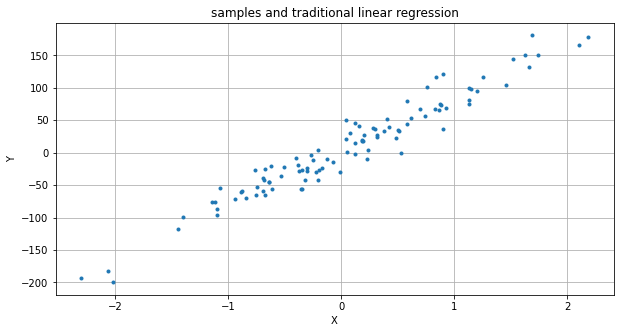

In [3]:
# convert X_numpy to horizental array
x_numpy = X_numpy.T[0]

# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples and traditional linear regression')

## 1. Math of linear regression, traditonal method


In [4]:
# do a traditional linear regression

import math
# ddof = 1: sample variance  
#      = 0: population variance
ddof = 0
mean_x = np.mean(x_numpy)
mean_y = np.mean(y_numpy)
print("mean of x and y", mean_x, mean_y)
print("standard deviation of x and y", np.std(x_numpy, ddof=ddof), np.std(y_numpy, ddof=ddof))
var_x = np.var(x_numpy, ddof=ddof)
var_y = np.var(y_numpy, ddof=ddof)
print("variance of x and y", var_x, var_y)
print("cov matrix of x and y: \n", np.cov(x_numpy, y_numpy, ddof=ddof))
cov_xy = np.cov(x_numpy, y_numpy, ddof=ddof)[0,1]
print("cov(x,y) =  ", cov_xy)
print('correlate coefficient matrix of x and y: \n', np.corrcoef(x_numpy,y_numpy))
r_xy = np.corrcoef(x_numpy,y_numpy)[0,1] # always sample variance type
print("correlation coefficient(x,y) =  ", r_xy)
print("our own calculation of r_xy from variances: ", math.sqrt(cov_xy**2/var_x/var_y))

b = cov_xy/var_x
a = mean_y - b * mean_x

print("linear regression to line y = a + bx, where b = {}; a = {}".format(b, a))
np.correlate(x_numpy,y_numpy, mode='valid')

x_hat = np.linspace(X_numpy.min(), X_numpy.max(), 1000)
y_hat = a + b * x_hat

mean of x and y 0.060582852075698704 9.051174996815666
standard deviation of x and y 0.8851562138315849 75.25470813506942
variance of x and y 0.7835015228846666 5663.2710964944845
cov matrix of x and y: 
 [[7.83501523e-01 6.46267308e+01]
 [6.46267308e+01 5.66327110e+03]]
cov(x,y) =   64.62673081029031
correlate coefficient matrix of x and y: 
 [[1.         0.97019401]
 [0.97019401 1.        ]]
correlation coefficient(x,y) =   0.9701940104899215
our own calculation of r_xy from variances:  0.9701940104899212
linear regression to line y = a + bx, where b = 82.48449929280295; a = 4.054028777621711


Text(0.5, 1.0, 'samples and traditional linear regression')

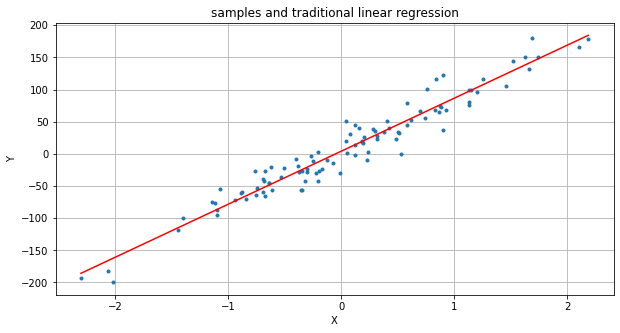

In [5]:
# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.plot(x_hat, y_hat, "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples and traditional linear regression')
